In [1]:
!pip install altair


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
import altair as alt

In [57]:
df = pd.read_csv('../finetune/reg_results.csv')
df = df[df['file_missing?']==False]

In [60]:
new_df = df.groupby('country').mean().reset_index().rename(columns={'wer': 'old_wer_mean', 'wil': 'old_wil_mean', 'new_wer': 'new_wer_mean', 'new_wil': 'new_wil_mean'})[['country', 'old_wil_mean', 'new_wil_mean']]
new_df['new_factor'] = new_df['new_wil_mean'] / new_df['old_wil_mean']
new_df['old_factor'] = 1.0
new_df = new_df.sort_values(by='new_factor')
print(new_df.head(20))

          country  old_wil_mean  new_wil_mean  new_factor  old_factor
96           mali      0.374096      0.308910    0.825751         1.0
63        hungary      0.171660      0.156117    0.909460         1.0
4          angola      0.175822      0.167431    0.952272         1.0
111         niger      0.243856      0.232737    0.954400         1.0
48       ethiopia      0.301525      0.291991    0.968380         1.0
122      portugal      0.212267      0.205927    0.970129         1.0
57         greece      0.257842      0.250169    0.970243         1.0
69        ireland      0.080355      0.078125    0.972258         1.0
130  saudi arabia      0.244617      0.238522    0.975080         1.0
128        russia      0.239121      0.234514    0.980737         1.0
26       cambodia      0.381886      0.375527    0.983348         1.0
67           iran      0.150297      0.148236    0.986286         1.0
79          kenya      0.371895      0.367363    0.987813         1.0
101       moldova   

/var/folders/_x/_nz4xk_j3rq5pc2gnzy35m800000gn/T/ipykernel_10615/3271873861.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new_df = df.groupby('country').mean().reset_index().rename(columns={'wer': 'old_wer_mean', 'wil': 'old_wil_mean', 'new_wer': 'new_wer_mean', 'new_wil': 'new_wil_mean'})[['country', 'old_wil_mean', 'new_wil_mean']]


In [59]:
!pip install matplotlib


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


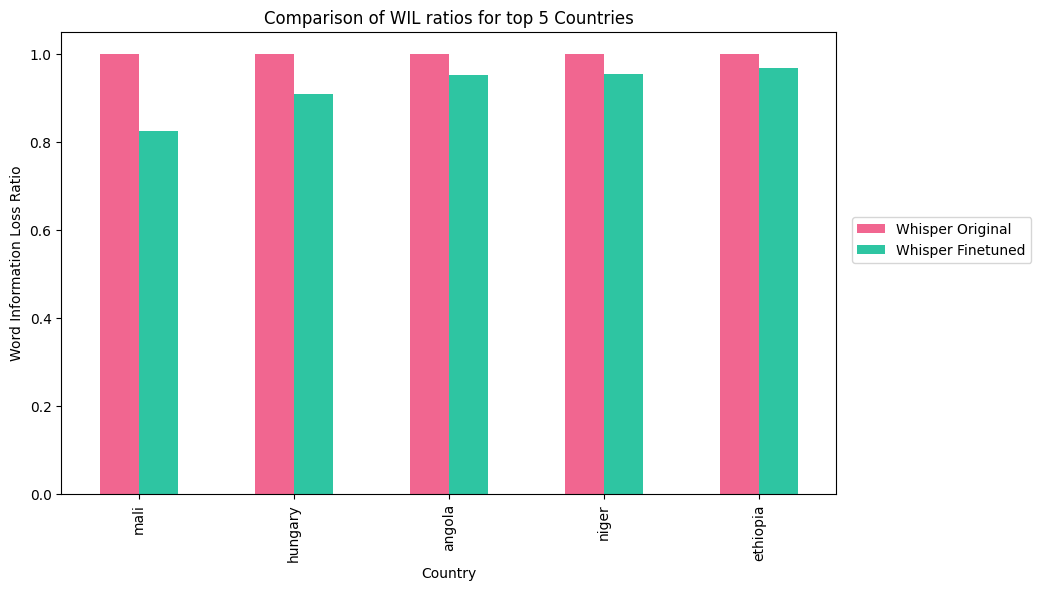

In [44]:
import matplotlib.pyplot as plt
# set the index to the country column
plot_df = new_df.set_index('country').head(5)

# plot the bar plot
ax = plot_df[['old_factor', 'new_factor']].plot(kind='bar', figsize=(10,6), color=['#F16690', '#2EC5A2'])
ax.set_title('Comparison of WIL ratios for top 5 Countries')
ax.set_xlabel('Country')
ax.set_ylabel('Word Information Loss Ratio')
ax.legend(['Whisper Original', 'Whisper Finetuned'],loc=(1.02, 0.5))

plt.show()

In [45]:
!pip install pycountry_convert

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 34.9 MB/s eta 0:00:00 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.5/320.5 kB 25.0 MB/s eta 0:00:00
  Using cached wheel-0.40.0-py3-none-any.whl (64 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.4/200.4 kB 14.7 MB/s eta 0:00:00
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681832 sha256=5556ea3b9df77ff3c8d28bd5e159fdc103598b8ff48f4300134305481c9c69ff
  Stored in directory: /Users/anujanjirwala/Library/Caches/pip/wheels/d5/97/a4/08cbb9a5350fc8af871bf1178f621758179442f3acacd39b65
Successfully built pycountry

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [46]:
import pycountry_convert as pc

def country_to_continent(country_name):
    try:
        country_name = country_name[0].upper() + country_name[1:]
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
        return country_continent_name
    except:
        return "undefined"

In [50]:
# df_rank_improvements['continent'] = country_to_continent(df_rank_improvements['country'])
print(df)
df['continent'] = ""
for i,r in df.iterrows():
    df.at[i,'continent']  = country_to_continent(r['country'])

      Unnamed: 0.1  Unnamed: 0   age  age_onset  \
32              32          32  27.0        9.0   
33              33          33  40.0        5.0   
34              34          34  43.0        4.0   
35              35          35  26.0        8.0   
36              36          36  19.0        6.0   
...            ...         ...   ...        ...   
2167          2167        2167  46.0        5.0   
2168          2168        2168  46.0       12.0   
2169          2169        2169  47.0        2.0   
2170          2170        2170  31.0        1.0   
2171          2171        2171  24.0       14.0   

                             birthplace    filename native_language     sex  \
32               virginia, south africa  afrikaans1       afrikaans  female   
33               pretoria, south africa  afrikaans2       afrikaans    male   
34    pretoria, transvaal, south africa  afrikaans3       afrikaans    male   
35               pretoria, south africa  afrikaans4       afrikaans    

In [51]:
print(df)

      Unnamed: 0.1  Unnamed: 0   age  age_onset  \
32              32          32  27.0        9.0   
33              33          33  40.0        5.0   
34              34          34  43.0        4.0   
35              35          35  26.0        8.0   
36              36          36  19.0        6.0   
...            ...         ...   ...        ...   
2167          2167        2167  46.0        5.0   
2168          2168        2168  46.0       12.0   
2169          2169        2169  47.0        2.0   
2170          2170        2170  31.0        1.0   
2171          2171        2171  24.0       14.0   

                             birthplace    filename native_language     sex  \
32               virginia, south africa  afrikaans1       afrikaans  female   
33               pretoria, south africa  afrikaans2       afrikaans    male   
34    pretoria, transvaal, south africa  afrikaans3       afrikaans    male   
35               pretoria, south africa  afrikaans4       afrikaans    

In [53]:
new_df = df.groupby('continent').mean().reset_index().rename(columns={'wer': 'old_wer_mean', 'wil': 'old_wil_mean', 'new_wer': 'new_wer_mean', 'new_wil': 'new_wil_mean'})[['continent', 'old_wil_mean', 'new_wil_mean']]
new_df['new_factor'] = new_df['new_wil_mean'] / new_df['old_wil_mean']
new_df['old_factor'] = 1.0
new_df = new_df.sort_values(by='new_factor')
# df['wil_difference'] = df['wil']-df['new_wil']
# df['new_wil_fraction'] = df['new_wil'] / df['wil']
# df['old_wil_fraction'] = 1.0
# df.sort_values(by='wil_difference')
# print(df.sort_values(by='wil_difference'))

/var/folders/_x/_nz4xk_j3rq5pc2gnzy35m800000gn/T/ipykernel_10615/1689487939.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new_df = df.groupby('continent').mean().reset_index().rename(columns={'wer': 'old_wer_mean', 'wil': 'old_wil_mean', 'new_wer': 'new_wer_mean', 'new_wil': 'new_wil_mean'})[['continent', 'old_wil_mean', 'new_wil_mean']]


In [55]:
print(new_df)

       continent  old_wil_mean  new_wil_mean  new_factor  old_factor
0         Africa      0.259368      0.256559    0.989171         1.0
6      undefined      0.141417      0.141001    0.997064         1.0
2         Europe      0.176726      0.176222    0.997152         1.0
3  North America      0.164480      0.164345    0.999180         1.0
4        Oceania      0.072521      0.072521    1.000000         1.0
5  South America      0.217449      0.217557    1.000499         1.0
1           Asia      0.242511      0.243983    1.006069         1.0


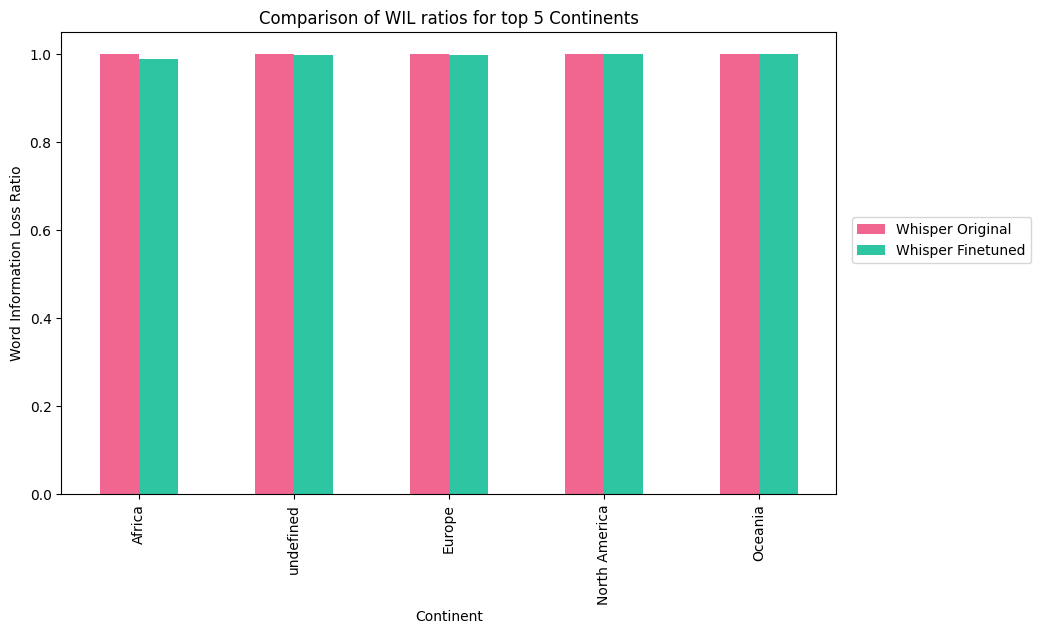

In [54]:
import matplotlib.pyplot as plt
# set the index to the country column
plot_df = new_df.set_index('continent').head(5)

# plot the bar plot
ax = plot_df[['old_factor', 'new_factor']].plot(kind='bar', figsize=(10,6), color=['#F16690', '#2EC5A2'])
ax.set_title('Comparison of WIL ratios for top 5 Continents')
ax.set_xlabel('Continent')
ax.set_ylabel('Word Information Loss Ratio')
ax.legend(['Whisper Original', 'Whisper Finetuned'],loc=(1.02, 0.5))

plt.show()

In [4]:
c1 =alt.Chart(df).mark_point(color='red').encode(
    x='mean_wer:Q',
    y='native_language',
    tooltip=['mean_wer:Q']
).transform_aggregate(
    mean_wer='mean(wer)',
    groupby=["native_language"]
)
c2 = alt.Chart(df).mark_point(color='orange').encode(
    x='new_mean_wer:Q',
    y='native_language',
    tooltip=['mean_wer:Q']
).transform_aggregate(
    new_mean_wer='mean(new_wer)',
    groupby=["native_language"]
)
c1 + c2

alt.LayerChart(...)

In [ ]:
c1 =alt.Chart(df).mark_point(color='red').encode(
    x='mean_wil:Q',
    y='native_language'
).transform_aggregate(
    mean_wil='mean(wil)',
    groupby=["native_language"]
)
c2 = alt.Chart(df).mark_point(color='orange').encode(
    x='new_mean_wil:Q',
    y='native_language',
    tooltip=['mean_wil:Q']
).transform_aggregate(
    new_mean_wil='mean(new_wil)',
    groupby=["native_language"]
)
c1 + c2

In [19]:
english = df[df['native_language']=='english']
print("wer", english['wer'].mean(), "new wer", english['new_wer'].mean())
print("wil", english['wil'].mean(), "new wil", english['new_wil'].mean())

wer 0.05554304021761658 new wer 0.05556807088683636
wil 0.08346281841105353 new wil 0.08341292369780848


In [20]:
english = df_is[df_is['native_language']=='english']
print("wer", english['wer'].mean(), "new wer", english['new_wer'].mean())
print("wil", english['wil'].mean(), "new wil", english['new_wil'].mean())

wer 0.05554304021761658 new wer 0.05574328552476782
wil 0.08346281841105353 new wil 0.08324585838598021


In [21]:
mandarin = df[df['native_language']=='mandarin']
print("wer", mandarin['wer'].mean(), "new wer", mandarin['new_wer'].mean())
print("wil", mandarin['wil'].mean(), "new wil", mandarin['new_wil'].mean())

wer 0.19955406906153847 new wer 0.2053511705685618
wil 0.2985414842307692 new wil 0.30227976450029753


In [22]:
mandarin = df_is[df_is['native_language']=='mandarin']
print("wer", mandarin['wer'].mean(), "new wer", mandarin['new_wer'].mean())
print("wil", mandarin['wil'].mean(), "new wil", mandarin['new_wil'].mean())

wer 0.19955406906153847 new wer 0.19843924191750273
wil 0.2985414842307692 new wil 0.29739021691538275


In [23]:
hindi = df[df['native_language']=='hindi']
print("wer", hindi['wer'].mean(), "new wer", hindi['new_wer'].mean())
print("wil", hindi['wil'].mean(), "new wil", hindi['new_wil'].mean())

wer 0.05958132033333333 new wer 0.05958132045088565
wil 0.0940769955 new wil 0.09407699544407368


In [24]:
hindi = df_is[df_is['native_language']=='hindi']
print("wer", hindi['wer'].mean(), "new wer", hindi['new_wer'].mean())
print("wil", hindi['wil'].mean(), "new wil", hindi['new_wil'].mean())

wer 0.05958132033333333 new wer 0.05958132045088565
wil 0.0940769955 new wil 0.09407699544407368


In [25]:
spanish = df[df['native_language']=='spanish']
print("wer", spanish['wer'].mean(), "new wer", spanish['new_wer'].mean())
print("wil", spanish['wil'].mean(), "new wil", spanish['new_wil'].mean())

wer 0.179728037191358 new wer 0.17999642154231524
wil 0.2615829926358025 new wil 0.2617855129889784


In [26]:
spanish = df_is[df_is['native_language']=='spanish']
print("wer", spanish['wer'].mean(), "new wer", spanish['new_wer'].mean())
print("wil", spanish['wil'].mean(), "new wil", spanish['new_wil'].mean())

wer 0.179728037191358 new wer 0.1805331901950259
wil 0.2615829926358025 new wil 0.2617332665978816


In [27]:
french = df[df['native_language']=='french']
print("wer", french['wer'].mean(), "new wer", french['new_wer'].mean())
print("wil", french['wil'].mean(), "new wil", french['new_wil'].mean())

wer 0.14377731769841268 new wer 0.14239705544053366
wil 0.21782733276190483 new wil 0.21699815182518684


In [28]:
french = df_is[df_is['native_language']=='french']
print("wer", french['wer'].mean(), "new wer", french['new_wer'].mean())
print("wil", french['wil'].mean(), "new wil", french['new_wil'].mean())

wer 0.14377731769841268 new wer 0.14262709914883825
wil 0.21782733276190483 new wil 0.21756291488980062


In [29]:
arabic = df[df['native_language']=='arabic']
print("wer", arabic['wer'].mean(), "new wer", arabic['new_wer'].mean())
print("wil", arabic['wil'].mean(), "new wil", arabic['new_wil'].mean())

wer 0.15188974138235295 new wer 0.14904802500710423
wil 0.20728519972549017 new wil 0.20519844626398195


In [30]:
arabic = df_is[df_is['native_language']=='arabic']
print("wer", arabic['wer'].mean(), "new wer", arabic['new_wer'].mean())
print("wil", arabic['wil'].mean(), "new wil", arabic['new_wil'].mean())

wer 0.15188974138235295 new wer 0.15089514066496162
wil 0.20728519972549017 new wil 0.20561794128310892


In [6]:
df_is = pd.read_csv('../finetune/is_results.csv')
df_is = df_is[df_is['file_missing?']==False]

In [10]:
df['method']='regular'
df_is['method']='importance'

In [11]:
dfs = [df,df_is]
concat_df = pd.concat(dfs)

In [12]:
# compare naive vs importance
domain = ['regular', 'importance']
range_ = ['green', 'blue']

alt.Chart(concat_df).mark_point().encode(
    x='mean_wer:Q',
    y='native_language',
    color=alt.Color('method', scale=alt.Scale(domain=domain, range=range_),legend=alt.Legend(title="Models by color")),
    tooltip=['mean_wer:Q']
).transform_aggregate(
    mean_wer='mean(new_wer)',
    groupby=["native_language","method"]
)

alt.Chart(...)

In [13]:
print("regular mean wil", df['new_wil'].mean(), "is mean wil", df_is['new_wil'].mean())

regular mean wil 0.18803422699191505 is mean wil 0.19016806035772746


In [15]:
# compare importance sampling and whisper
c1 =alt.Chart(df).mark_point(color='red', opacity = 0.5).encode(
    x='mean_wer:Q',
    y='native_language',
    tooltip=['mean_wer:Q']
).transform_aggregate(
    mean_wer='mean(wer)',
    groupby=["native_language"]
)
c2 = alt.Chart(df).mark_point(color='blue', opacity = 0.5).encode(
    x='new_mean_wer:Q',
    y='native_language',
    tooltip=['new_mean_wer:Q']
).transform_aggregate(
    new_mean_wer='mean(new_wer)',
    groupby=["native_language"]
)
c1 + c2

alt.LayerChart(...)

In [16]:
# compare naive vs importance
domain = ['regular', 'importance']
range_ = ['green', 'blue']

alt.Chart(concat_df).mark_point().encode(
    x='mean_wil:Q',
    y='native_language',
    color=alt.Color('method', scale=alt.Scale(domain=domain, range=range_),legend=alt.Legend(title="Models by color")),
    tooltip=['mean_wil:Q']
).transform_aggregate(
    mean_wil='mean(new_wil)',
    groupby=["native_language","method"]
)

alt.Chart(...)

In [18]:
# compare importance sampling and whisper
c1 =alt.Chart(df).mark_point(color='red', opacity = 0.5).encode(
    x='mean_wil:Q',
    y='native_language',
    tooltip=['mean_wil:Q']
).transform_aggregate(
    mean_wil='mean(wil)',
    groupby=["native_language"]
)
c2 = alt.Chart(df).mark_point(color='blue', opacity = 0.5).encode(
    x='new_mean_wil:Q',
    y='native_language',
    tooltip=['new_mean_wil:Q']
).transform_aggregate(
    new_mean_wil='mean(new_wil)',
    groupby=["native_language"]
)
c1 + c2

alt.LayerChart(...)

In [3]:
df = pd.read_csv('../finetune/reg_results.csv')
df = df[df['file_missing?']==False]

In [4]:
df['wil_difference'] = df['wil']-df['new_wil']

In [5]:
df_rank = df.groupby(['native_language','country'])['wil_difference'].mean().reset_index(name="wil_difference")

In [19]:
# df_rank = df_rank[df_rank['wil_difference']>0]
# df_rank.to_csv("ranks_country.csv")

In [6]:
len(df_rank)

378

In [7]:
# df_rank = df_rank[df_rank['wil_difference'] > 0]

In [8]:
df_rank_improvements = df_rank[df_rank['wil_difference'] > 0]

In [9]:
len(df_rank_improvements)

204

In [40]:
import pycountry_convert as pc

def country_to_continent(country_name):
    try:
        country_name = country_name[0].upper() + country_name[1:]
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
        return country_continent_name
    except:
        return "undefined"

In [41]:
country_to_continent("India")

'Asia'

In [42]:
# df_rank_improvements['continent'] = country_to_continent(df_rank_improvements['country'])
df_rank_improvements['continent'] = ""
for i,r in df_rank_improvements.iterrows():
    df_rank_improvements.at[i,'continent']  = country_to_continent(r['country'])

In [43]:
df_rank_improvements.head(10)

native_language                      country  wil_difference  continent
2             akan                        ghana    4.347826e-10     Africa
3         albanian                      albania    2.124404e-10     Europe
5          amazigh                      morocco    8.427306e-11     Africa
6          amharic                     ethiopia    1.477823e-02     Africa
7           arabic                      algeria    4.291117e-10     Africa
9           arabic                        egypt    1.136379e-10     Africa
12          arabic  israel (occupied territory)    1.214534e-10  undefined
13          arabic                       jordan    1.950816e-10       Asia
15          arabic                      lebanon    2.796086e-11       Asia
16          arabic                        libya    2.348218e-10     Africa

In [44]:
df_rank_improvements.to_csv("final_results.csv")

In [45]:
df['continent'] = ""
for i,r in df.iterrows():
    df.at[i,'continent']  = country_to_continent(r['country'])

In [49]:
df.head(50)

Unnamed: 0.1  Unnamed: 0   age  age_onset  \
32            32          32  27.0        9.0   
33            33          33  40.0        5.0   
34            34          34  43.0        4.0   
35            35          35  26.0        8.0   
36            36          36  19.0        6.0   
37            37          37  25.0       15.0   
38            38          38  41.0        5.0   
39            39          39  19.0        6.0   
40            40          40  33.0       15.0   
41            41          41  44.0       35.0   
42            42          42  33.0       28.0   
43            43          43  31.0       11.0   
44            44          44  25.0       11.0   
45            45          45  45.0       11.0   
46            46          46  43.0        9.0   
47            47          47  22.0        6.0   
48            48          48  37.0       32.0   
49            49          49  39.0       16.0   
50            50          50  20.0        5.0   
51            51          51  29.0       19.0   
52            52          52  24.0       17.0   
53            53          53  26.0       15.0   
54            54          54  28.0        6.0   
55            55          55  31.0       12.0   
56            56          56  23.0        6.0   
57            57          57  36.0       11.0   
58            58          58  21.0        9.0   
59            59          59  20.0        2.0   
60            60          60  19.0       10.0   
61            61          61  23.0        7.0   
62            62          62  52.0       24.0   
63            63          63  27.0        8.0   
64            64          64  20.0        7.0   
65            65          65  31.0        7.0   
66            66          66  31.0        4.0   
67            67          67  38.0       13.0   
68            68          68  30.0       12.0   
69            69          69  40.0       12.0   
70            70          70  38.0       12.0   
71            71          71  26.0        5.0   
72            72          72  40.0       10.0   
73            73          73  21.0       10.0   
74            74          74  22.0        3.0   
75            75          75  30.0       14.0   
76            76          76  32.0       11.0   
77            77          77  25.0       15.0   
78            78          78  47.0       11.0   
79            79          79  40.0       33.0   
80            80          80  22.0       16.0   
81            81          81  35.0       15.0   

                           birthplace    filename native_language     sex  \
32             virginia, south africa  afrikaans1       afrikaans  female   
33             pretoria, south africa  afrikaans2       afrikaans    male   
34  pretoria, transvaal, south africa  afrikaans3       afrikaans    male   
35             pretoria, south africa  afrikaans4       afrikaans    male   
36            cape town, south africa  afrikaans5       afrikaans    male   
37               diekabo, ivory coast       agni1            agni    male   
38                       accra, ghana       akan1            akan    male   
39                  prishtina, kosovo   albanian1        albanian    male   
40                    tirana, albania   albanian2        albanian    male   
41                    tirana, albania   albanian3        albanian    male   
42                  mitrovice, kosovo   albanian4        albanian    male   
43                     vlore, albania   albanian5        albanian    male   
44                  prishtina, kosovo   albanian6        albanian  female   
45                  prishtina, kosovo   albanian7        albanian  female   
46                  prishtina, kosovo   albanian8        albanian  female   
47                    tirana, albania   albanian9        albanian  female   
48                      tata, morocco    amazigh1         amazigh    male   
49                 ouarzazat, morocco    amazigh2         amazigh    male   
50              addis ababa, ethiopia    

In [48]:
# compare importance sampling and whisper
c1 =alt.Chart(df).mark_point(color='red', opacity = 0.5).encode(
    x='mean_wil:Q',
    y='continent',
    tooltip=['mean_wil:Q']
).transform_aggregate(
    mean_wil='mean(wil)',
    groupby=["continent"]
)
c2 = alt.Chart(df).mark_point(color='blue', opacity = 0.5).encode(
    x='new_mean_wil:Q',
    y='continent',
    tooltip=['new_mean_wil:Q']
).transform_aggregate(
    new_mean_wil='mean(new_wil)',
    groupby=["continent"]
)
c1 + c2

alt.LayerChart(...)